# Imporing libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data preprocessing

## Training image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


## Validation Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

## Building layers

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

## Building Convolution Layers

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model Training

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 233s 98ms/step - loss: 1.3290 - accuracy: 0.6087 - val_loss: 0.5529 - val_accuracy: 0.8288
Epoch 2/10
2197/2197 [==============================] - 204s 93ms/step - loss: 0.4349 - accuracy: 0.8628 - val_loss: 0.3469 - val_accuracy: 0.8928
Epoch 3/10
2197/2197 [==============================] - 206s 93ms/step - loss: 0.2631 - accuracy: 0.9158 - val_loss: 0.2329 - val_accuracy: 0.9240
Epoch 4/10
2197/2197 [==============================] - 206s 94ms/step - loss: 0.1796 - accuracy: 0.9414 - val_loss: 0.2119 - val_accuracy: 0.9340
Epoch 5/10
2197/2197 [==============================] - 229s 104ms/step - loss: 0.1390 - accuracy: 0.9550 - val_loss: 0.1385 - val_accuracy: 0.9561
Epoch 6/10
2197/2197 [==============================] - 219s 100ms/step - loss: 0.1079 - accuracy: 0.9645 - val_loss: 0.1628 - val_accuracy: 0.9496
Epoch 7/10
2197/2197 [==============================] - 238s 108ms/step - loss: 0.0889 - accuracy: 0.9711 - val_loss

## Model Evolution

In [21]:
#Model Evolution on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 112s 51ms/step - loss: 0.0296 - accuracy: 0.9906


In [22]:
print(train_loss,train_acc)

0.029598811641335487 0.9905967712402344


In [23]:
#Model on velidation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 23s 40ms/step - loss: 0.1274 - accuracy: 0.9631


In [24]:
print(val_loss,val_acc)

0.12739473581314087 0.9630662202835083


## Saving Model

In [57]:
model.save('trained_model.h5')

In [58]:

model.save('trained_model.keras')


In [59]:
training_history.history

{'loss': [1.3290437459945679,
  0.4349311888217926,
  0.26314061880111694,
  0.1796359121799469,
  0.13899964094161987,
  0.10785268247127533,
  0.08885713666677475,
  0.07540933787822723,
  0.062472160905599594,
  0.05722090229392052],
 'accuracy': [0.6087061762809753,
  0.8627783060073853,
  0.9158119559288025,
  0.9414182901382446,
  0.9549754858016968,
  0.9644782543182373,
  0.9710790514945984,
  0.9750195741653442,
  0.9799274206161499,
  0.9821324348449707],
 'val_loss': [0.5528603792190552,
  0.34691402316093445,
  0.2328641712665558,
  0.21193550527095795,
  0.13848620653152466,
  0.16275055706501007,
  0.13828134536743164,
  0.13111206889152527,
  0.1267423778772354,
  0.12739476561546326],
 'val_accuracy': [0.8288185596466064,
  0.8928408622741699,
  0.9240268468856812,
  0.9339858889579773,
  0.9561233520507812,
  0.9495788812637329,
  0.9564648270606995,
  0.9615297317504883,
  0.9626109600067139,
  0.9630662202835083]}

In [60]:
#Recording History in json
import json
with open("training_hist.json","w")as f:
    json.dump(training_history.history,f)

In [61]:
training_history.history['val_accuracy']

[0.8288185596466064,
 0.8928408622741699,
 0.9240268468856812,
 0.9339858889579773,
 0.9561233520507812,
 0.9495788812637329,
 0.9564648270606995,
 0.9615297317504883,
 0.9626109600067139,
 0.9630662202835083]

## Accuracy Visualization

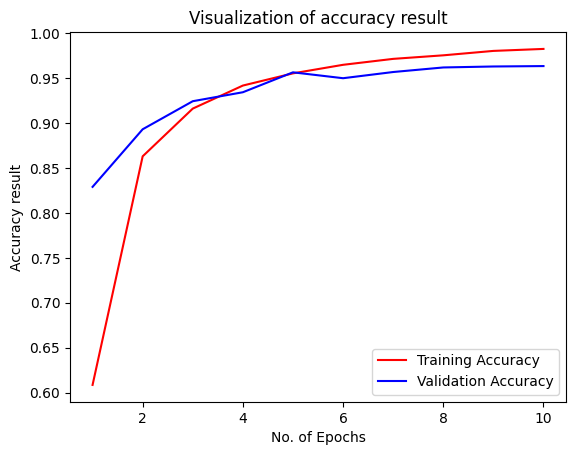

In [62]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy result")
plt.title("Visualization of accuracy result")
plt.legend()
plt.show()

## Some other model for model evolution

In [63]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [64]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [65]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 86s 156ms/step


(array([[1.0000000e+00, 6.8610700e-11, 4.5837059e-13, ..., 2.3888462e-17,
         1.2226297e-15, 3.5205639e-15],
        [9.9999964e-01, 1.3098468e-08, 1.1208805e-11, ..., 2.1018643e-14,
         1.6806473e-13, 3.5901745e-13],
        [1.0000000e+00, 2.0849189e-11, 4.8621029e-14, ..., 1.9062521e-20,
         6.7159551e-18, 6.3422180e-16],
        ...,
        [5.5346860e-10, 8.0828226e-13, 1.7424643e-09, ..., 2.4228289e-13,
         3.7008580e-11, 9.9999940e-01],
        [2.6988614e-10, 1.5110080e-13, 2.8948886e-09, ..., 8.0468862e-13,
         1.3390071e-11, 9.9999905e-01],
        [4.5404503e-17, 2.0315095e-21, 1.2025987e-18, ..., 1.4079003e-20,
         5.8934877e-18, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [66]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [67]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [68]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [69]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

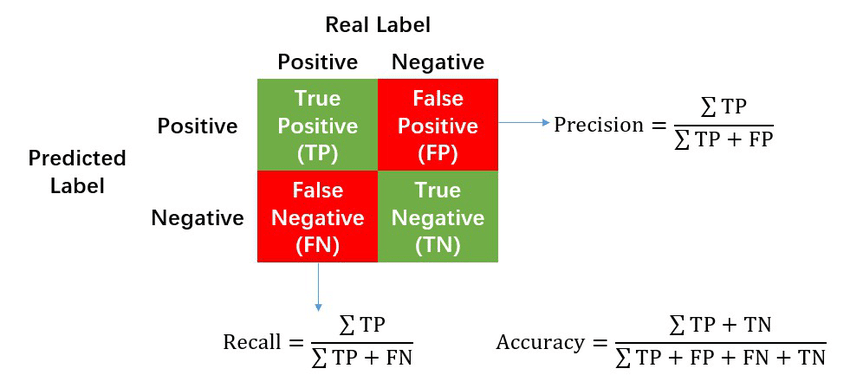![image.png]

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.96      0.96       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.95      0.95      0.95       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.95      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.87      0.

In [72]:
from sklearn.metrics import confusion_matrix

# Now you can use the confusion_matrix function
cm = confusion_matrix(Y_true, predicted_categories)
print(cm)


[[485   1   1 ...   0   0   0]
 [  2 484   1 ...   0   0   0]
 [  0   0 437 ...   0   0   0]
 ...
 [  0   0   0 ... 487   0   0]
 [  0   0   0 ...   0 446   0]
 [  2   0   1 ...   0   1 473]]


## Confusion Matrix Visualisation

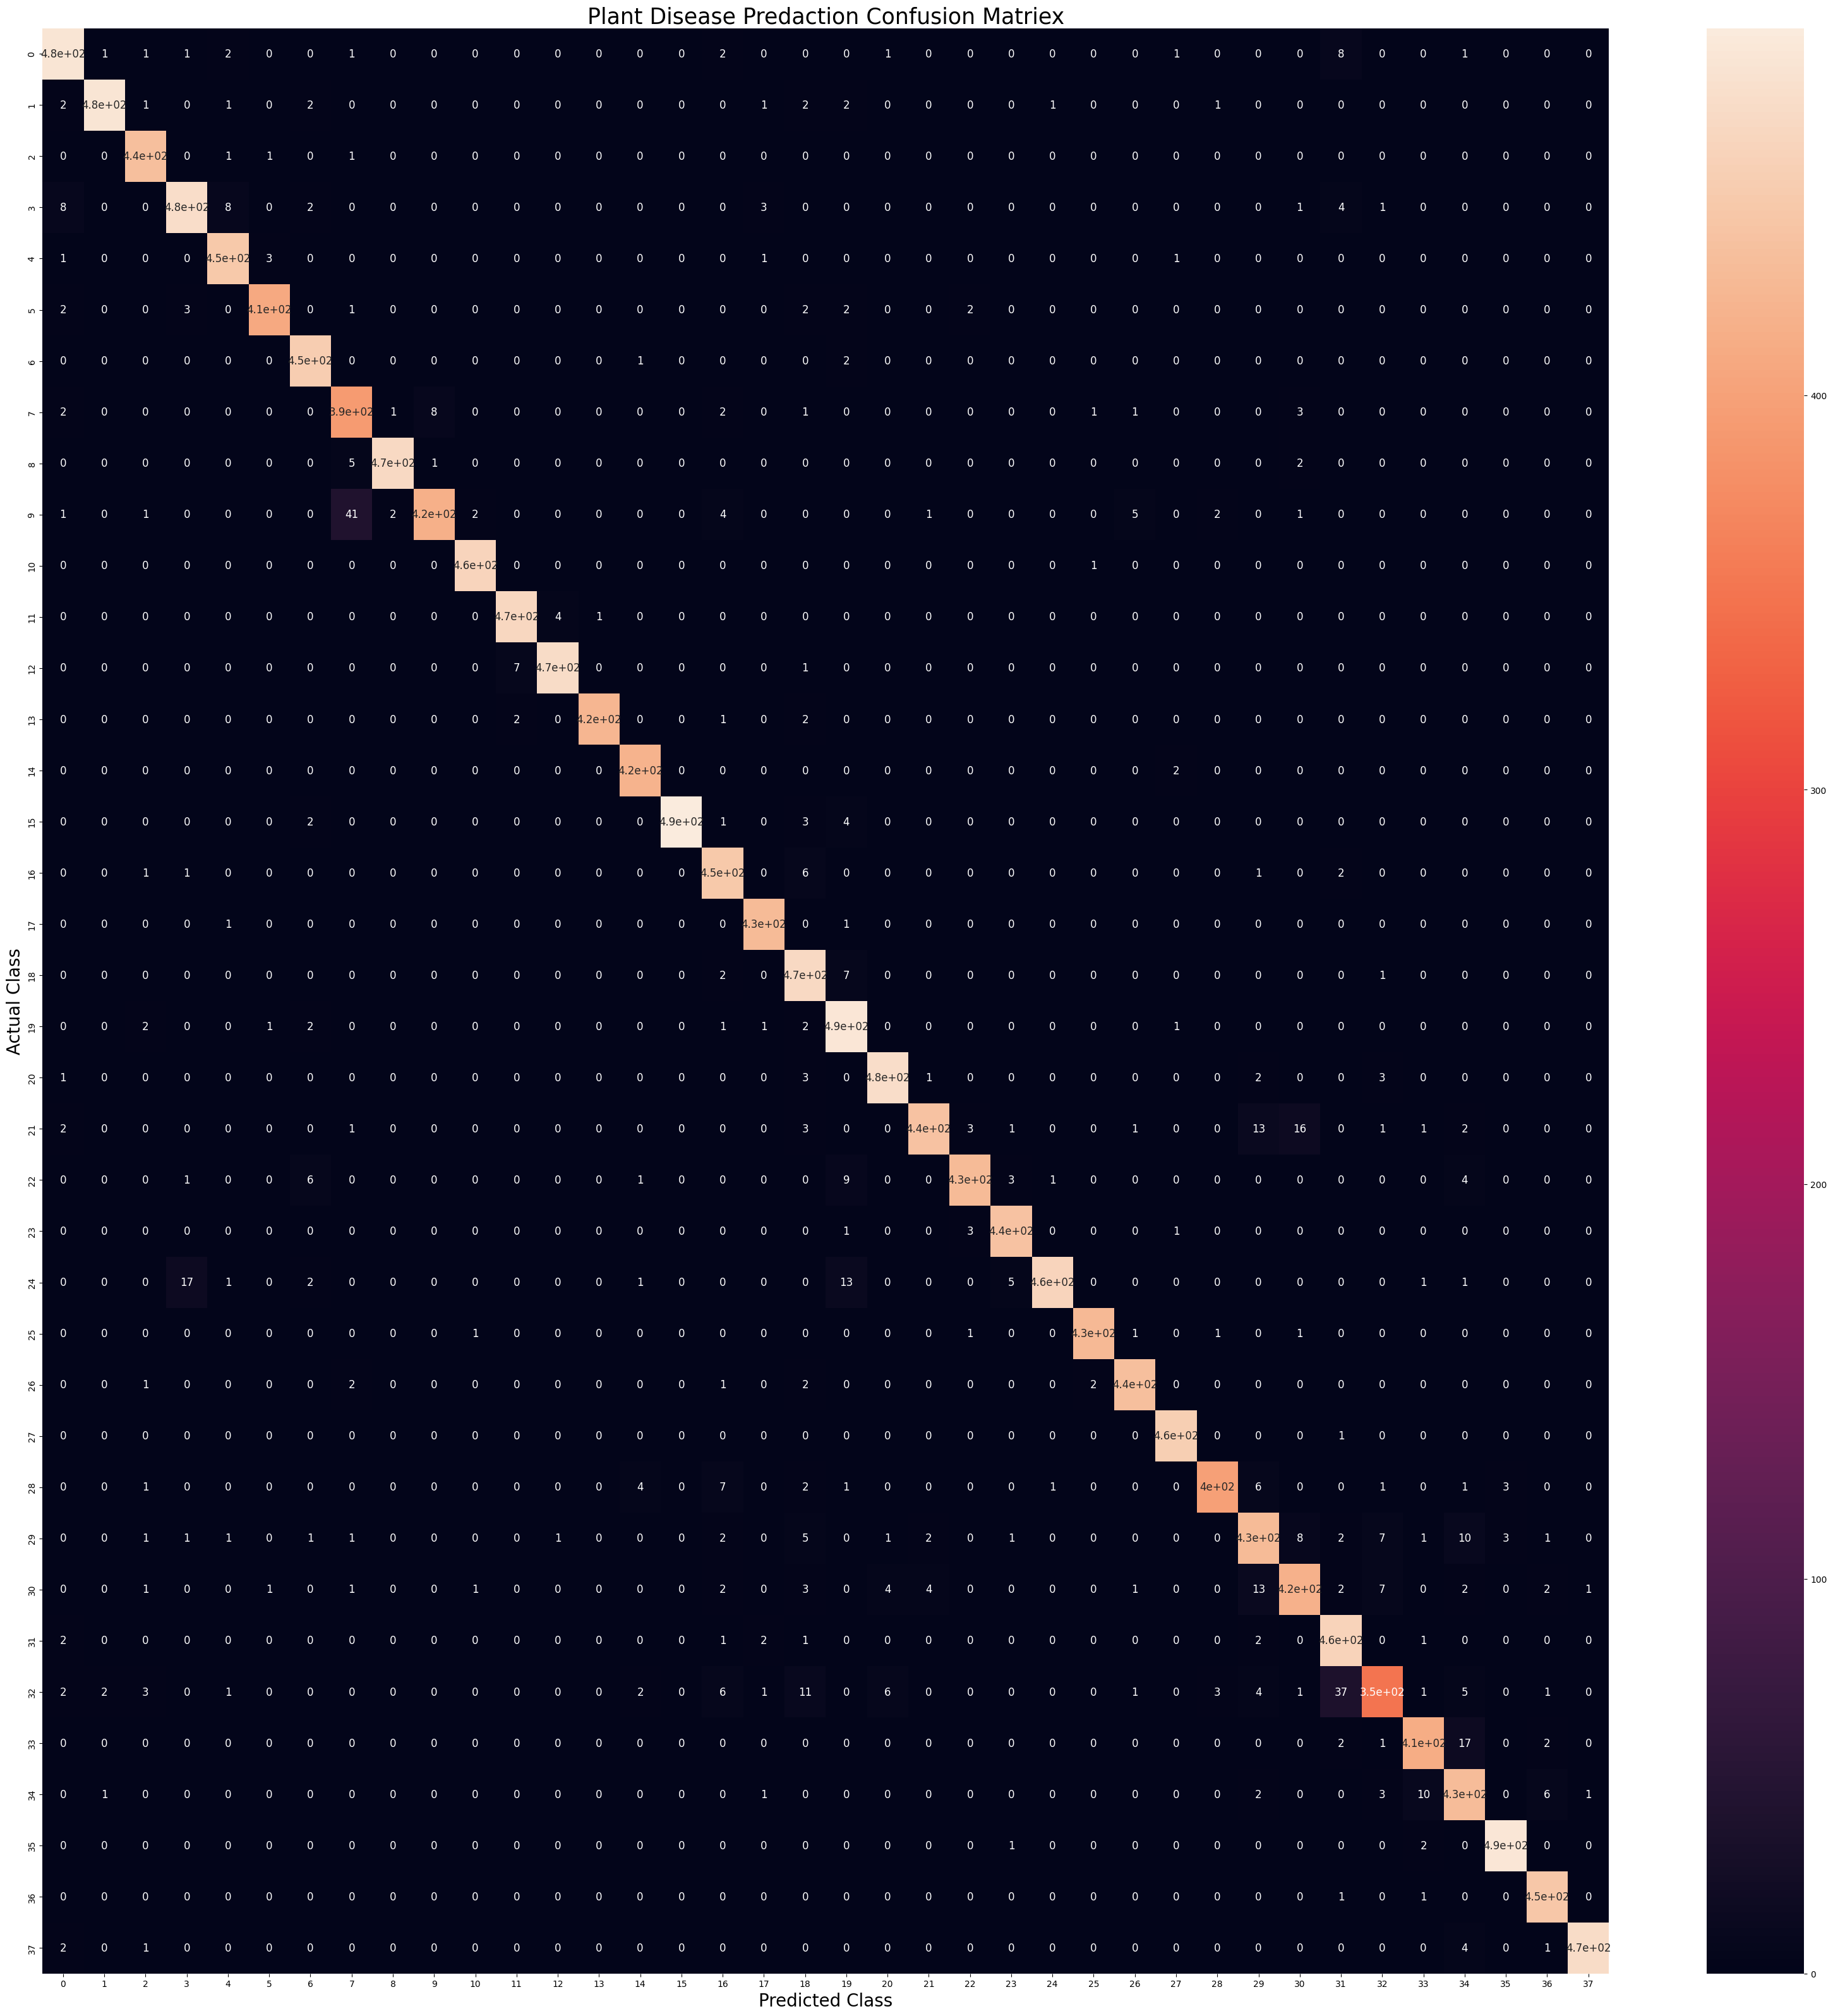

In [73]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':12})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Predaction Confusion Matriex",fontsize=25)
plt.show()